In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [105]:
#READ EXPRESSION MATRIX AND EUCLIDEAN DISTANCE MATRIX
ed = pd.read_csv('Euclidean-correlation.csv', index_col =0)
exp = pd.read_csv('Expression.csv')

In [106]:
exp

,Unnamed: 0,Olfr1416,Olfr1415,Olfr1414,Olfr1413,Olfr1412,Olfr1411,Olfr1410,Olfr12,Olfr16,...,Olfr1495,Olfr1496,Olfr1496.1,Olfr1497,Olfr1499,Olfr1500,Olfr1501,Olfr1502,Olfr1504,Olfr1505
0,IMMATURE CELL1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,IMMATURE CELL2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,IMMATURE CELL3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,IMMATURE CELL4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,IMMATURE CELL5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,IMPrecursor CELL31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3658,IMPrecursor CELL32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3659,IMPrecursor CELL33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,IMPrecursor CELL34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
exp.index=exp['Unnamed: 0']
exp=exp.drop(['Unnamed: 0'],axis=1)

In [108]:
eud = ed
eu = ed

In [109]:
#MAKE A LIST OF ALL ORS AND CELLS AND TRANSPOSE THE EXP MATRIX
ors=list(exp.columns.values.tolist())
cells=exp.index.values
tr_exp=exp.T

In [110]:
tr_exp

Unnamed: 0,IMMATURE CELL1,IMMATURE CELL2,IMMATURE CELL3,IMMATURE CELL4,IMMATURE CELL5,IMMATURE CELL6,IMMATURE CELL7,IMMATURE CELL8,IMMATURE CELL9,IMMATURE CELL10,...,IMPrecursor CELL26,IMPrecursor CELL27,IMPrecursor CELL28,IMPrecursor CELL29,IMPrecursor CELL30,IMPrecursor CELL31,IMPrecursor CELL32,IMPrecursor CELL33,IMPrecursor CELL34,IMPrecursor CELL35
Olfr1416,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Olfr1415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Olfr1414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Olfr1413,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Olfr1412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Olfr1500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Olfr1501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Olfr1502,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Olfr1504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
#CHECK IF THE CELL EXPRESSES MORE THAN 8 ORS THEN APPEND THE CELL ID 
all_ors={}
zero_exp=[]
for cell in cells:
    all_ors[cell]=[]
    cell_exps=sorted(tr_exp[cell].tolist(), reverse=True)
    if cell_exps[0]>0:
        if tr_exp[cell].tolist().count(max(cell_exps)) > 8:
            for i in range(tr_exp[cell].tolist().count(max(tr_exp[cell]))):
                all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
        else:
            for i in range(8):
                if cell_exps[i]>0:
                    all_ors[cell].append(tr_exp.sort_values(by=cell, ascending=False).index[i])
    else:
        zero_exp.append(cell)

In [112]:
#INDIVIDUALLY MAKE A DICTIONARY FOR EACH CELL TYPE WHERE THE CELL ID AND THE EXPRESSED OR IS STORED
cell_imt={}
cell_imm={}
cell_mat={}
for key,value in all_ors.items():
  if key.startswith("IMT"):
    cell_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imt[key].append(val)
  if key.startswith("MA"):
    cell_mat[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_mat[key].append(val)
  if key.startswith("IMM"):
    for val in value:
      cell_imm[key]=[]
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm[key].append(val)


In [113]:
#TO TREAT IMMATURE AND TRANSITION AS ONE, MERGE THE DICTIONARY
cell_imm_imt={}
for key,value in all_ors.items():
  if key.startswith("IM"):
    cell_imm_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm_imt[key].append(val)

In [114]:
#CHECK IF THERE IS NO EXPRESSION OF OR, MAKE A NEW DICTIONARY WITH ONLY EXPRESSED ORs
di1={}
for key,value in cell_imm_imt.items():
  di2={}
  if len(value)<1:
    continue
  else:
    for val in value:
      di2[val]=tr_exp[key][val]
    di1[key]=di2

# mOSNs vs tsOSNs (RCT1)

In [115]:
#TO TREAT IMMATURE AND TRANSITION AS ONE, MERGE THE DICTIONARY
cell_imm_imt={}
for key,value in all_ors.items():
  if key.startswith("IMT"):
    cell_imm_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm_imt[key].append(val)
print(len(cell_imm_imt))

309


In [ ]:
eud2=pd.read_csv('wild_euclidean.csv')

In [ ]:
eud1=eud2.filter(regex='^IMT')
eud1.index=eud2['Unnamed: 0']
eud0=eud1.T.filter(regex='^MAT').T

In [116]:
eud=eud0.T[list(cell_mat.keys())].T

In [117]:
eud

,IMT CELL1,IMT CELL2,IMT CELL3,IMT CELL4,IMT CELL5,IMT CELL6,IMT CELL7,IMT CELL8,IMT CELL9,IMT CELL10,...,IMT CELL300,IMT CELL301,IMT CELL302,IMT CELL303,IMT CELL304,IMT CELL305,IMT CELL306,IMT CELL307,IMT CELL308,IMT CELL309
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
MATURE CELL1,1.807301,1.205495,1.550222,1.654706,1.217779,1.373174,1.610441,1.452716,1.338739,1.981484,...,3.505876,1.663400,2.397806,1.845641,2.786435,3.446741,2.795151,3.724569,2.501829,3.711676
MATURE CELL2,3.524354,2.903816,3.278018,3.232314,2.993992,2.933641,3.409092,3.251275,2.813419,3.533083,...,5.276332,3.461822,4.086888,3.642905,4.566509,5.210666,4.519137,5.509241,4.281527,5.501158
MATURE CELL3,1.381825,0.991061,1.256060,0.876161,1.321318,0.685260,1.830103,1.742926,0.493532,1.065015,...,3.688407,1.887569,2.997688,1.913874,2.994243,3.667441,2.220637,3.799295,2.232007,3.747002
MATURE CELL4,5.964969,5.444398,5.793061,5.478972,5.693317,5.251681,6.213014,6.076803,5.063228,5.648258,...,8.172719,6.273501,7.185893,6.379393,7.448300,8.132073,6.815742,8.332467,6.820944,8.293520
MATURE CELL5,4.321653,4.102753,4.290687,3.805881,4.440037,3.752047,4.924464,4.855764,3.582798,3.773494,...,6.616484,4.978116,6.109814,4.959188,5.986718,6.618089,4.786919,6.651673,5.055027,6.576615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MATURE CELL2273,6.252668,6.725024,6.484995,6.221942,6.886812,6.489876,6.905275,7.001341,6.527015,5.896971,...,6.876676,6.904107,7.599155,6.690714,6.854838,6.964554,5.524979,6.624501,6.070249,6.519183
MATURE CELL2274,4.476441,4.968625,4.713439,4.476414,5.115087,4.753768,5.118125,5.216536,4.806499,4.149556,...,5.156262,5.116095,5.818691,4.901825,5.087118,5.239346,3.735585,4.923329,4.281990,4.816240
MATURE CELL2275,6.015407,6.463015,6.240409,5.952323,6.641255,6.212064,6.690109,6.778706,6.238628,5.630259,...,6.783966,6.692511,7.438469,6.484470,6.715457,6.868061,5.336527,6.545795,5.888805,6.439134


In [118]:
os.mkdir('RCT')
os.system('cp wild_euclidean.csv RCT/')
os.chdir('Wild_type/RCT')

In [119]:
#GENERATE UNIQUE HITS
ratio_data={}
unique_number = {}
unique_percentage = {}
di='test_'+str(1)
os.mkdir(di)
os.chdir(di) 
#A FILE IS GENERATED WITH ALL INFORMATION OF mOSN, iOSN/tOSN, THE EUCLIDEAN DISTANCE AND OR EXPRESSED
with open("Out_data_rct_"+str(1)+".csv","w")as fout:
    fout.write("Olfactory Receptor,Mature Cell ID,Immature/Transition Cell ID, ED,Dist. Rank,Receptor Expression Rank,Receptor Expression,Expression Diffrence from rank1\n")
    empty_mat=[]
    mat_cell=eud.index
    imm_imt_cells=list(eud.columns.values.tolist())
    for i in range(len(mat_cell)):
        mat1={}
        for j in range(len(imm_imt_cells)):
            mat1[eud.iloc[i][j]]=imm_imt_cells[j]
        euds=sorted(mat1.keys(), reverse=False)
        for j in range(len(euds)):
            if len(cell_mat[mat_cell[i]])==0:
                empty_mat.append(mat_cell[i])
            else:
                if cell_mat[mat_cell[i]][0] in cell_imm_imt[mat1[euds[j]]]:
                    for k in range(len(cell_imm_imt[mat1[euds[j]]])):
                        if cell_imm_imt[mat1[euds[j]]][k]==cell_mat[mat_cell[i]][0]:
                            #print(cell_imm_imt[mat1[euds[j]]][k],mat_cell[i],mat1[euds[j]],euds[j],k,di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])
                            fout.write(str(cell_imm_imt[mat1[euds[j]]][k])+','+str(mat_cell[i])+','+str(mat1[euds[j]])+','+str(euds[j])+','+str(j)+','+str(k)+','+str(di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+','+str((di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][0]])-di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+'\n')

#CALCULATING PERCENTILE AT DIFFERENT THRESHOLD FOR EUC DISTANCE
eu = eud
li = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for ki in li:
    q = eu.quantile(ki , axis = 1)
    q1 = q.tolist()
    qq = pd.DataFrame(q)

    idd = eu.index.tolist()
    ccl = eu.columns.tolist()
    d4=dict.fromkeys(idd)

    #loop to generate imm cells
    k = []
    for i in range(len(idd)):
        for j in range(len(ccl)):
            if eu.iloc[i][j] < q1[i]:
                k.append(ccl[j])
        d4[idd[i]] = k
        k=[]

    p = []
    for i in idd:
        p.append(len(d4[i]))
    cells = pd.DataFrame.from_dict(d4, orient='index')
    cells.to_csv(str(ki)+'percentile_euc_total_immature.csv')


#ASSIGNING THE STATUS POSITIVE AND NEGATIVE ON BASIS OF THE mOSN THAT LIE IN THAT PARTICULAR THRESHOLD
for ki in li:
    p=pd.read_csv(str(ki)+'percentile_euc_total_immature.csv', index_col = 0)
    o = pd.read_csv('Out_data_rct_'+str(1)+'.csv')
    dictt={}
    v =  o['Mature Cell ID'].tolist()
    v2 = o['Immature/Transition Cell ID'].tolist()
    for indx in range(len(v)):
        if v[indx]==v[indx-1]:
            dictt[v[indx]].append(v2[indx])
        else:
            dictt[v[indx]]=[]
            dictt[v[indx]].append(v2[indx])
    ke=[]
    for key in dictt:
        ke.append(key)
    pp = p.loc[ke].T
    ppp = pp.to_dict('list')
    dup = pd.read_csv('Out_data_rct_'+str(1)+'.csv')
    stat=[]
    for i in range(0,len(dup['Immature/Transition Cell ID'])):
        if dup['Immature/Transition Cell ID'][i] in ppp[dup['Mature Cell ID'][i]]:
            stat.append('Positive')
        else:
            stat.append('Negative')

    dup['status'] = stat
    #dup.to_csv('Final_spl_10q.csv')
    dup.to_csv(str(ki)+'percentile_neg_pos_out_data.csv')
    

In [120]:
li = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
valss_unique=[]
for ki in li:
    percntile_dat=pd.read_csv(str(ki)+'percentile_neg_pos_out_data.csv')
    res1=pd.DataFrame()
    for mat in list(set(percntile_dat['Mature Cell ID'].tolist())):
        res1=res1.append(percntile_dat[percntile_dat['Mature Cell ID']==mat].sort_values(by=' ED', ascending=True).drop_duplicates(subset = 'Mature Cell ID', keep = 'first'))
    #print(len(res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)]))
    valss_unique.append(len(res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)]))
    res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)].to_csv(str(ki)+'percentile_unique_out_data.csv')

In [121]:
valss_unique

[23, 31, 48, 93, 160, 197, 247, 262, 291, 320, 342, 376]

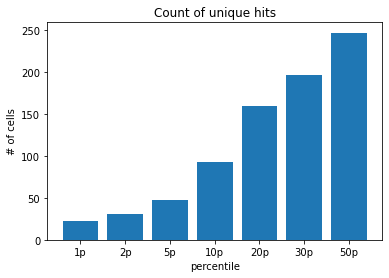

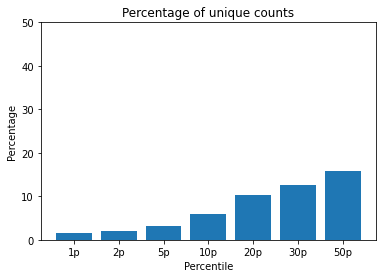

In [122]:
#PLOT OF NUMBER OF UNIQUE mOSNs 

unique_number[str(1)]=valss_unique

gra = pd.DataFrame(valss_unique)
gra.to_csv('unique-count.csv')


x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p']
plt.bar(x,valss_unique[0:7])
plt.title('Count of unique hits')
plt.xlabel('percentile')
plt.ylabel('# of cells')
plt.savefig('number of unique hits euclidean.pdf')
plt.show()


#PERCENTAGE OF UNIQUE mOSNs
valssf=[]
for v in valss_unique:
    valssf.append((v/1566)*100) #1566 is the number of total unique mOSNs having atleast some expression of an specific OR

unique_percentage[str(1)]=valssf


gra = pd.DataFrame(valssf)
gra.to_csv('unique-percentage.csv')


plt.bar(x,valssf[0:7])
plt.title('Percentage of unique counts')
plt.xlabel('Percentile')
plt.ylabel('Percentage')
plt.savefig('percentage')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.savefig('percentage_normalised_hits.pdf')
plt.show()

In [123]:
os.chdir('Wild_type/RCT')

In [124]:
out=pd.read_csv("test_1/Out_data_rct_"+str(1)+".csv")

In [125]:
res1=pd.DataFrame()
for mat in list(set(out['Mature Cell ID'].tolist())):
    res1=res1.append(out[out['Mature Cell ID']==mat].sort_values(by=' ED', ascending=True).drop_duplicates(subset = 'Mature Cell ID', keep = 'first'))
res1=res1[res1['Expression Diffrence from rank1']==0]

In [126]:
res1.to_csv("Out_data_rct_"+di+".csv")

# tsOSNs vs iOSNs (RCT2)

In [127]:
#redefining mature cells to transiton ones
cell_mat={}
for i in range(len(res1['Immature/Transition Cell ID'].tolist())):
    cell_mat[res1['Immature/Transition Cell ID'].tolist()[i]]=res1['Olfactory Receptor'].tolist()[i]


In [129]:
#TO TREAT IMMATURE AND TRANSITION AS ONE, MERGE THE DICTIONARY
cell_imm_imt={}
for key,value in all_ors.items():
  if key.startswith("IMM"):
    cell_imm_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm_imt[key].append(val)
print(len(cell_imm_imt))

520


In [131]:
#CHECK IF THERE IS NO EXPRESSION OF OR, MAKE A NEW DICTIONARY WITH ONLY EXPRESSED ORs
di1={}
for key,value in cell_imm_imt.items():
  di2={}
  if len(value)<1:
    continue
  else:
    for val in value:
      di2[val]=tr_exp[key][val]
    di1[key]=di2

In [132]:
eud2=pd.read_csv('wild_euclidean.csv')

In [133]:
eud1=eud2.filter(regex='^IMM')
eud1.index=eud2['Unnamed: 0']
eud0=eud1.T.filter(regex='^IMT').T

In [134]:
eud=eud0.T[list(cell_mat.keys())].T

In [135]:
eud

,IMMATURE CELL1,IMMATURE CELL2,IMMATURE CELL3,IMMATURE CELL4,IMMATURE CELL5,IMMATURE CELL6,IMMATURE CELL7,IMMATURE CELL8,IMMATURE CELL9,IMMATURE CELL10,...,IMMATURE CELL511,IMMATURE CELL512,IMMATURE CELL513,IMMATURE CELL514,IMMATURE CELL515,IMMATURE CELL516,IMMATURE CELL517,IMMATURE CELL518,IMMATURE CELL519,IMMATURE CELL520
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
IMT CELL248,2.705002,2.506807,2.716611,2.448650,3.140221,2.481642,1.591173,1.919664,5.879624,2.221369,...,6.233032,5.207066,5.844552,3.873184,6.826919,6.886490,6.876865,6.298680,2.847759,6.557626
IMT CELL132,3.088584,4.600833,3.743845,3.311806,3.034987,6.035708,5.139925,5.605668,8.247879,5.812562,...,7.726936,6.829031,7.481969,2.771830,7.998545,7.976122,7.909659,7.457563,5.424034,7.510765
IMT CELL59,1.917104,3.040093,2.434630,1.965191,2.132089,4.222533,3.316132,3.774920,6.784521,3.992417,...,6.569067,5.586737,6.259759,2.451949,6.980109,6.991157,6.946425,6.425457,3.794106,6.567207
IMT CELL82,4.809903,5.598622,5.253280,4.799694,5.043784,5.929538,5.058880,5.346334,9.253250,5.667600,...,9.322224,8.307992,8.977613,5.272611,9.798831,9.823604,9.787675,9.245943,6.172524,9.419599
IMT CELL178,2.567206,3.778817,3.131896,2.662197,2.708661,4.903441,3.986791,4.427871,7.521376,4.665395,...,7.264579,6.294068,6.965765,2.843758,7.649150,7.652989,7.603264,7.095324,4.533820,7.218000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMT CELL197,2.219805,1.859807,2.133579,1.924229,2.668006,2.139813,1.217938,1.655633,5.298975,1.895462,...,5.593244,4.566375,5.208059,3.461222,6.181497,6.240191,6.230127,5.652273,2.237260,5.910649
IMT CELL122,2.240999,3.822922,2.905124,2.498344,2.145637,5.437809,4.578829,5.063642,7.402264,5.233079,...,6.830473,5.944444,6.592698,1.878125,7.094197,7.071194,7.004580,6.553978,4.665091,6.605668
IMT CELL45,2.924564,4.031039,3.457879,2.988206,3.096239,4.988766,4.066411,4.483075,7.777290,4.742174,...,7.592543,6.609276,7.282452,3.264638,7.999191,8.007941,7.961397,7.444664,4.750384,7.579675


In [136]:
os.chdir('Wild_type/RCT')

In [137]:
#GENERATE UNIQUE HITS
ratio_data={}
unique_number = {}
unique_percentage = {}
di='test_'+str(2)
os.mkdir(di)
os.chdir(di) 
#A FILE IS GENERATED WITH ALL INFORMATION OF mOSN, iOSN/tOSN, THE EUCLIDEAN DISTANCE AND OR EXPRESSED
with open("Out_data_rct_"+str(2)+".csv","w")as fout:
    fout.write("Olfactory Receptor,Mature Cell ID,Immature/Transition Cell ID, ED,Dist. Rank,Receptor Expression Rank,Receptor Expression,Expression Diffrence from rank1\n")
    empty_mat=[]
    mat_cell=eud.index
    imm_imt_cells=list(eud.columns.values.tolist())
    for i in range(len(mat_cell)):
        mat1={}
        for j in range(len(imm_imt_cells)):
            mat1[eud.iloc[i][j]]=imm_imt_cells[j]
        euds=sorted(mat1.keys(), reverse=False)
        for j in range(len(euds)):
            if len(cell_mat[mat_cell[i]])==0:
                empty_mat.append(mat_cell[i])
            else:
                #print(cell_mat[mat_cell[i]])
                #print(cell_imm_imt[mat1[euds[j]]])
                if cell_mat[mat_cell[i]] in cell_imm_imt[mat1[euds[j]]]:
                    for k in range(len(cell_imm_imt[mat1[euds[j]]])):
                        #print(cell_imm_imt[mat1[euds[j]]][k],cell_mat[mat_cell[i]])
                        if cell_imm_imt[mat1[euds[j]]][k]==cell_mat[mat_cell[i]]:
                            #print(cell_imm_imt[mat1[euds[j]]][k],mat_cell[i],mat1[euds[j]],euds[j],k,di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])
                            fout.write(str(cell_imm_imt[mat1[euds[j]]][k])+','+str(mat_cell[i])+','+str(mat1[euds[j]])+','+str(euds[j])+','+str(j)+','+str(k)+','+str(di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+','+str((di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][0]])-di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+'\n')

#CALCULATING PERCENTILE AT DIFFERENT THRESHOLD FOR EUC DISTANCE
eu = eud
li = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for ki in li:
    q = eu.quantile(ki , axis = 1)
    q1 = q.tolist()
    qq = pd.DataFrame(q)

    idd = eu.index.tolist()
    ccl = eu.columns.tolist()
    d4=dict.fromkeys(idd)

    #loop to generate imm cells
    k = []
    for i in range(len(idd)):
        for j in range(len(ccl)):
            if eu.iloc[i][j] < q1[i]:
                k.append(ccl[j])
        d4[idd[i]] = k
        k=[]

    p = []
    for i in idd:
        p.append(len(d4[i]))
    cells = pd.DataFrame.from_dict(d4, orient='index')
    cells.to_csv(str(ki)+'percentile_euc_total_immature.csv')


#ASSIGNING THE STATUS POSITIVE AND NEGATIVE ON BASIS OF THE mOSN THAT LIE IN THAT PARTICULAR THRESHOLD
for ki in li:
    p=pd.read_csv(str(ki)+'percentile_euc_total_immature.csv', index_col = 0)
    o = pd.read_csv('Out_data_rct_'+str(2)+'.csv')
    dictt={}
    v =  o['Mature Cell ID'].tolist()
    v2 = o['Immature/Transition Cell ID'].tolist()
    for indx in range(len(v)):
        if v[indx]==v[indx-1]:
            dictt[v[indx]].append(v2[indx])
        else:
            dictt[v[indx]]=[]
            dictt[v[indx]].append(v2[indx])
    ke=[]
    for key in dictt:
        ke.append(key)
    pp = p.loc[ke].T
    ppp = pp.to_dict('list')
    dup = pd.read_csv('Out_data_rct_'+str(2)+'.csv')
    stat=[]
    for i in range(0,len(dup['Immature/Transition Cell ID'])):
        if dup['Immature/Transition Cell ID'][i] in ppp[dup['Mature Cell ID'][i]]:
            stat.append('Positive')
        else:
            stat.append('Negative')

    dup['status'] = stat
    #dup.to_csv('Final_spl_10q.csv')
    dup.to_csv(str(ki)+'percentile_neg_pos_out_data.csv')
    

In [138]:
li = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
valss_unique=[]
for ki in li:
    percntile_dat=pd.read_csv(str(ki)+'percentile_neg_pos_out_data.csv')
    res1=pd.DataFrame()
    for mat in list(set(percntile_dat['Mature Cell ID'].tolist())):
        res1=res1.append(percntile_dat[percntile_dat['Mature Cell ID']==mat].sort_values(by=' ED', ascending=True).drop_duplicates(subset = 'Mature Cell ID', keep = 'first'))
    #print(len(res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)]))
    valss_unique.append(len(res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)]))
    res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)].to_csv(str(ki)+'percentile_unique_out_data.csv')

In [139]:
valss_unique

[1, 4, 6, 11, 16, 21, 34, 37, 40, 43, 43, 43]

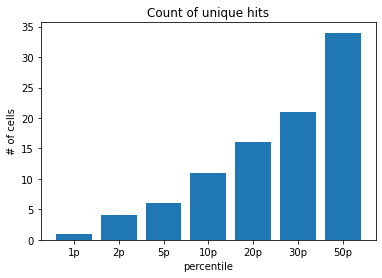

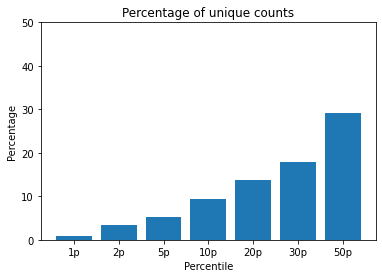

In [140]:
#PLOT OF NUMBER OF UNIQUE mOSNs 

unique_number[str(1)]=valss_unique

gra = pd.DataFrame(valss_unique)
gra.to_csv('unique-count.csv')


x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p']
plt.bar(x,valss_unique[0:7])
plt.title('Count of unique hits')
plt.xlabel('percentile')
plt.ylabel('# of cells')
plt.savefig('number of unique hits euclidean.pdf')
plt.show()


#PERCENTAGE OF UNIQUE mOSNs
valssf=[]
for v in valss_unique:
    valssf.append((v/len(eud))*100) #The number of total unique tsOSNs having atleast some expression of an specific OR

unique_percentage[str(1)]=valssf


gra = pd.DataFrame(valssf)
gra.to_csv('unique-percentage.csv')


plt.bar(x,valssf[0:7])
plt.title('Percentage of unique counts')
plt.xlabel('Percentile')
plt.ylabel('Percentage')
plt.savefig('percentage')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.savefig('percentage_normalised_hits.pdf')
plt.show()

In [141]:
os.chdir('Wild_type/RCT')

In [142]:
out=pd.read_csv("test_2/Out_data_rct_"+str(2)+".csv")

In [143]:
res1=pd.DataFrame()
for mat in list(set(out['Mature Cell ID'].tolist())):
    res1=res1.append(out[out['Mature Cell ID']==mat].sort_values(by=' ED', ascending=True).drop_duplicates(subset = 'Mature Cell ID', keep = 'first'))
res1=res1[res1['Expression Diffrence from rank1']==0]

In [144]:
res1.to_csv("Out_data_rct_"+di+".csv")

# iOSNs vs NPCs (RCT3)

In [145]:
#redefining mature cells to transiton ones
cell_mat={}
for i in range(len(res1['Immature/Transition Cell ID'].tolist())):
    cell_mat[res1['Immature/Transition Cell ID'].tolist()[i]]=res1['Olfactory Receptor'].tolist()[i]


In [146]:
#TO TREAT IMMATURE AND TRANSITION AS ONE, MERGE THE DICTIONARY
cell_imm_imt={}
for key,value in all_ors.items():
  if key.startswith("IMP"):
    cell_imm_imt[key]=[]
    for val in value:
      if val.startswith("Olfm"):
        continue
      else:
        cell_imm_imt[key].append(val)

In [148]:
#CHECK IF THERE IS NO EXPRESSION OF OR, MAKE A NEW DICTIONARY WITH ONLY EXPRESSED ORs
di1={}
for key,value in cell_imm_imt.items():
  di2={}
  if len(value)<1:
    continue
  else:
    for val in value:
      di2[val]=tr_exp[key][val]
    di1[key]=di2

In [149]:
eud2=pd.read_csv('wild_euclidean.csv')

In [150]:
eud1=eud2.filter(regex='^IMP')
eud1.index=eud2['Unnamed: 0']
eud0=eud1.T.filter(regex='^IMM').T

In [151]:
eud=eud0.T[list(cell_mat.keys())].T

In [152]:
eud

,IMPrecursor CELL1,IMPrecursor CELL2,IMPrecursor CELL3,IMPrecursor CELL4,IMPrecursor CELL5,IMPrecursor CELL6,IMPrecursor CELL7,IMPrecursor CELL8,IMPrecursor CELL9,IMPrecursor CELL10,...,IMPrecursor CELL26,IMPrecursor CELL27,IMPrecursor CELL28,IMPrecursor CELL29,IMPrecursor CELL30,IMPrecursor CELL31,IMPrecursor CELL32,IMPrecursor CELL33,IMPrecursor CELL34,IMPrecursor CELL35
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
IMMATURE CELL275,2.880534,2.907577,2.902825,3.015086,3.860964,3.995253,3.182190,3.699659,3.769303,3.099891,...,3.649735,3.037139,2.800796,2.779739,2.926823,3.312617,3.056645,2.882670,3.279380,3.730386
IMMATURE CELL506,4.136438,3.038572,3.951629,4.252341,4.589829,4.803183,4.339736,4.505662,4.530179,4.257478,...,4.277151,4.099569,4.096458,4.172202,4.248637,4.220298,4.211264,4.131780,4.326926,4.583845
IMMATURE CELL372,1.858980,2.455089,1.950466,1.995108,2.993200,3.088633,2.179687,2.806733,2.892236,2.099777,...,2.840511,2.072368,1.771773,1.736794,1.891008,2.396539,2.058813,1.862764,2.309769,2.816431
IMMATURE CELL105,4.822826,3.960888,4.706203,4.947965,5.440306,5.638394,5.065960,5.337162,5.372626,4.982255,...,5.144264,4.852940,4.766325,4.801489,4.910297,5.021142,4.936240,4.820711,5.089188,5.404813
IMMATURE CELL402,3.011387,2.160502,2.837060,3.127513,3.544094,3.740806,3.218463,3.439641,3.475342,3.135831,...,3.254015,2.984890,2.971996,3.053220,3.124676,3.129240,3.089591,3.006741,3.215875,3.508373
IMMATURE CELL498,3.965414,2.809590,3.763239,4.078481,4.375956,4.592725,4.157617,4.296482,4.318304,4.075975,...,4.059662,3.911060,3.929956,4.016134,4.083717,4.019253,4.029848,3.960102,4.135518,4.377138
IMMATURE CELL366,3.711994,2.281574,3.443143,3.812625,3.932161,4.164729,3.858241,3.876909,3.885150,3.780062,...,3.598709,3.588496,3.694166,3.817334,3.851641,3.640644,3.734864,3.704251,3.798059,3.968875
IMMATURE CELL183,4.990797,4.038785,4.856905,5.114059,5.559382,5.763887,5.224831,5.463793,5.494973,5.141353,...,5.255653,5.004239,4.937820,4.981308,5.083815,5.158313,5.095208,4.988103,5.238361,5.535459
IMMATURE CELL47,4.723944,3.946025,4.624329,4.850811,5.386869,5.578931,4.975769,5.276995,5.316311,4.891936,...,5.098079,4.770308,4.663976,4.690627,4.805756,4.951644,4.846100,4.722408,5.008305,5.340895


In [153]:
os.chdir('Wild_type/RCT')

In [154]:
#GENERATE UNIQUE HITS
ratio_data={}
unique_number = {}
unique_percentage = {}
di='test_'+str(3)
os.mkdir(di)
os.chdir(di) 
#A FILE IS GENERATED WITH ALL INFORMATION OF mOSN, iOSN/tOSN, THE EUCLIDEAN DISTANCE AND OR EXPRESSED
with open("Out_data_rct_"+str(3)+".csv","w")as fout:
    fout.write("Olfactory Receptor,Mature Cell ID,Immature/Transition Cell ID, ED,Dist. Rank,Receptor Expression Rank,Receptor Expression,Expression Diffrence from rank1\n")
    empty_mat=[]
    mat_cell=eud.index
    imm_imt_cells=list(eud.columns.values.tolist())
    for i in range(len(mat_cell)):
        mat1={}
        for j in range(len(imm_imt_cells)):
            mat1[eud.iloc[i][j]]=imm_imt_cells[j]
        euds=sorted(mat1.keys(), reverse=False)
        for j in range(len(euds)):
            if len(cell_mat[mat_cell[i]])==0:
                empty_mat.append(mat_cell[i])
            else:
                #print(cell_mat[mat_cell[i]])
                #print(cell_imm_imt[mat1[euds[j]]])
                if cell_mat[mat_cell[i]] in cell_imm_imt[mat1[euds[j]]]:
                    for k in range(len(cell_imm_imt[mat1[euds[j]]])):
                        #print(cell_imm_imt[mat1[euds[j]]][k],cell_mat[mat_cell[i]])
                        if cell_imm_imt[mat1[euds[j]]][k]==cell_mat[mat_cell[i]]:
                            #print(cell_imm_imt[mat1[euds[j]]][k],mat_cell[i],mat1[euds[j]],euds[j],k,di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])
                            fout.write(str(cell_imm_imt[mat1[euds[j]]][k])+','+str(mat_cell[i])+','+str(mat1[euds[j]])+','+str(euds[j])+','+str(j)+','+str(k)+','+str(di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+','+str((di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][0]])-di1[mat1[euds[j]]][cell_imm_imt[mat1[euds[j]]][k]])+'\n')

#CALCULATING PERCENTILE AT DIFFERENT THRESHOLD FOR EUC DISTANCE
eu = eud
li = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
for ki in li:
    q = eu.quantile(ki , axis = 1)
    q1 = q.tolist()
    qq = pd.DataFrame(q)

    idd = eu.index.tolist()
    ccl = eu.columns.tolist()
    d4=dict.fromkeys(idd)

    #loop to generate imm cells
    k = []
    for i in range(len(idd)):
        for j in range(len(ccl)):
            if eu.iloc[i][j] < q1[i]:
                k.append(ccl[j])
        d4[idd[i]] = k
        k=[]

    p = []
    for i in idd:
        p.append(len(d4[i]))
    cells = pd.DataFrame.from_dict(d4, orient='index')
    cells.to_csv(str(ki)+'percentile_euc_total_immature.csv')


#ASSIGNING THE STATUS POSITIVE AND NEGATIVE ON BASIS OF THE mOSN THAT LIE IN THAT PARTICULAR THRESHOLD
for ki in li:
    p=pd.read_csv(str(ki)+'percentile_euc_total_immature.csv', index_col = 0)
    o = pd.read_csv('Out_data_rct_'+str(3)+'.csv')
    dictt={}
    v =  o['Mature Cell ID'].tolist()
    v2 = o['Immature/Transition Cell ID'].tolist()
    for indx in range(len(v)):
        if v[indx]==v[indx-1]:
            dictt[v[indx]].append(v2[indx])
        else:
            dictt[v[indx]]=[]
            dictt[v[indx]].append(v2[indx])
    ke=[]
    for key in dictt:
        ke.append(key)
    pp = p.loc[ke].T
    ppp = pp.to_dict('list')
    dup = pd.read_csv('Out_data_rct_'+str(3)+'.csv')
    stat=[]
    for i in range(0,len(dup['Immature/Transition Cell ID'])):
        if dup['Immature/Transition Cell ID'][i] in ppp[dup['Mature Cell ID'][i]]:
            stat.append('Positive')
        else:
            stat.append('Negative')

    dup['status'] = stat
    #dup.to_csv('Final_spl_10q.csv')
    dup.to_csv(str(ki)+'percentile_neg_pos_out_data.csv')
    

In [155]:
li = [0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
valss_unique=[]
for ki in li:
    percntile_dat=pd.read_csv(str(ki)+'percentile_neg_pos_out_data.csv')
    res1=pd.DataFrame()
    for mat in list(set(percntile_dat['Mature Cell ID'].tolist())):
        res1=res1.append(percntile_dat[percntile_dat['Mature Cell ID']==mat].sort_values(by=' ED', ascending=True).drop_duplicates(subset = 'Mature Cell ID', keep = 'first'))
    #print(len(res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)]))
    valss_unique.append(len(res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)]))
    res1[(res1['status']=='Positive') & (res1['Expression Diffrence from rank1']==0)].to_csv(str(ki)+'percentile_unique_out_data.csv')

In [156]:
valss_unique

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]

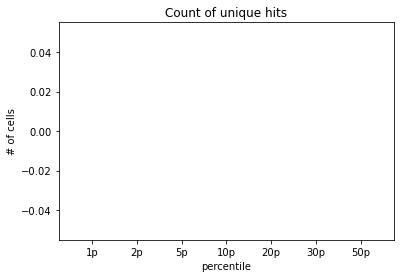

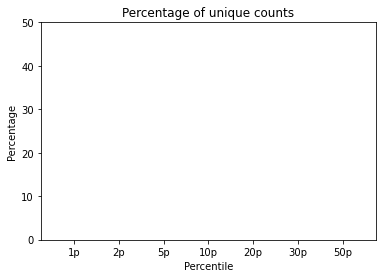

In [157]:
#PLOT OF NUMBER OF UNIQUE mOSNs 

unique_number[str(1)]=valss_unique

gra = pd.DataFrame(valss_unique)
gra.to_csv('unique-count.csv')


x = ['1p', '2p', '5p', '10p', '20p', '30p', '50p']
plt.bar(x,valss_unique[0:7])
plt.title('Count of unique hits')
plt.xlabel('percentile')
plt.ylabel('# of cells')
plt.savefig('number of unique hits euclidean.pdf')
plt.show()


#PERCENTAGE OF UNIQUE mOSNs
valssf=[]
for v in valss_unique:
    valssf.append((v/len(eud))*100) #The number of total unique iOSNs having atleast some expression of an specific OR

unique_percentage[str(1)]=valssf


gra = pd.DataFrame(valssf)
gra.to_csv('unique-percentage.csv')


plt.bar(x,valssf[0:7])
plt.title('Percentage of unique counts')
plt.xlabel('Percentile')
plt.ylabel('Percentage')
plt.savefig('percentage')
plt.yticks([0, 10, 20, 30, 40, 50])
plt.savefig('percentage_normalised_hits.pdf')
plt.show()

In [158]:
os.chdir('Wild_type/RCT')

In [159]:
out=pd.read_csv("test_3/Out_data_rct_"+str(3)+".csv")

In [160]:
res1=pd.DataFrame()
for mat in list(set(out['Mature Cell ID'].tolist())):
    res1=res1.append(out[out['Mature Cell ID']==mat].sort_values(by=' ED', ascending=True).drop_duplicates(subset = 'Mature Cell ID', keep = 'first'))
res1=res1[res1['Expression Diffrence from rank1']==0]

In [162]:
res1.to_csv("Out_data_rct_"+di+".csv")

In [ ]:
out={}
final_res=pd.DataFrame()
os.chdir('Wild_type/RCT')
if os.path.exists("Out_data_rct_test_1.csv"):
    dat=pd.read_csv("Out_data_rct_test_1.csv",index_col=0)
    out['1']=dat[['Olfactory Receptor','Mature Cell ID',' ED','Immature/Transition Cell ID']]
    out['1']=out['1'].rename(columns = {' ED': 'RCT1', 'Immature/Transition Cell ID': 'tsOSN Cell ID', 'Mature Cell ID': 'mOSN Cell ID'}, inplace = False)
if os.path.exists("Out_data_rct_test_2.csv"):
    dat=pd.read_csv("Out_data_rct_test_2.csv",index_col=0)
    out['2']=dat[['Olfactory Receptor',' ED','Immature/Transition Cell ID']]
    out['2']=out['2'].rename(columns = {' ED': 'RCT2', 'Immature/Transition Cell ID': 'iOSN Cell ID'}, inplace = False)
if os.path.exists("Out_data_rct_test_3.csv"):
    dat=pd.read_csv("Out_data_rct_test_3.csv",index_col=0)
    out['3']=dat[['Olfactory Receptor',' ED','Immature/Transition Cell ID']]
    out['3']=out['3'].rename(columns = {' ED': 'RCT3', 'Immature/Transition Cell ID': 'NPC ID'}, inplace = False)

res=pd.DataFrame()
for i in list(out.keys()):
    if len(res)==0:
        res=out[i]
    else:
        res=pd.merge(res, out[i], on='Olfactory Receptor', how='outer')
res.to_csv('Out_data_rct_'+di+'.csv')
resED=res.filter(regex='^RCT').fillna(0)
resED['RCT']=resED.sum(axis=1)
for i in list(resED.columns):
    resED=resED.rename(columns = {i:di+'_'+i}, inplace = False)

final_res=pd.concat([final_res, resED], axis=1, join='outer')

In [ ]:
final_res.to_csv('Out_data_final.csv')